In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
final_dataset = pd.read_csv('car_clean_data_final.csv')

In [4]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4.50,8.76,145500,0,6,1,0,1,1
1,3.70,7.20,120000,1,6,1,0,1,1
2,1.58,10.25,140000,2,14,0,1,1,1
3,2.25,8.55,127000,0,10,1,0,1,1
4,1.30,7.38,120000,0,13,0,1,1,1


In [5]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.683885,-0.214744,-0.239645,-0.414695,0.206801,-0.206801,-0.394140,-0.592695
Present_Price,0.683885,1.000000,-0.038862,-0.103459,-0.150689,0.217136,-0.217136,-0.190631,-0.414941
Kms_Driven,-0.214744,-0.038862,1.000000,0.297313,0.409014,0.255793,-0.255793,0.200803,0.198375
Owner,-0.239645,-0.103459,0.297313,1.000000,0.510038,0.034792,-0.034792,0.232874,0.158902
no_year,-0.414695,-0.150689,0.409014,0.510038,1.000000,-0.049203,0.049203,0.245728,0.252122
Fuel_Type_Diesel,0.206801,0.217136,0.255793,0.034792,-0.049203,1.000000,-1.000000,0.019384,0.024864
Fuel_Type_Petrol,-0.206801,-0.217136,-0.255793,-0.034792,0.049203,-1.000000,1.000000,-0.019384,-0.024864
Seller_Type_Individual,-0.394140,-0.190631,0.200803,0.232874,0.245728,0.019384,-0.019384,1.000000,0.390759
Transmission_Manual,-0.592695,-0.414941,0.198375,0.158902,0.252122,0.024864,-0.024864,0.390759,1.000000


In [6]:
import seaborn as sns

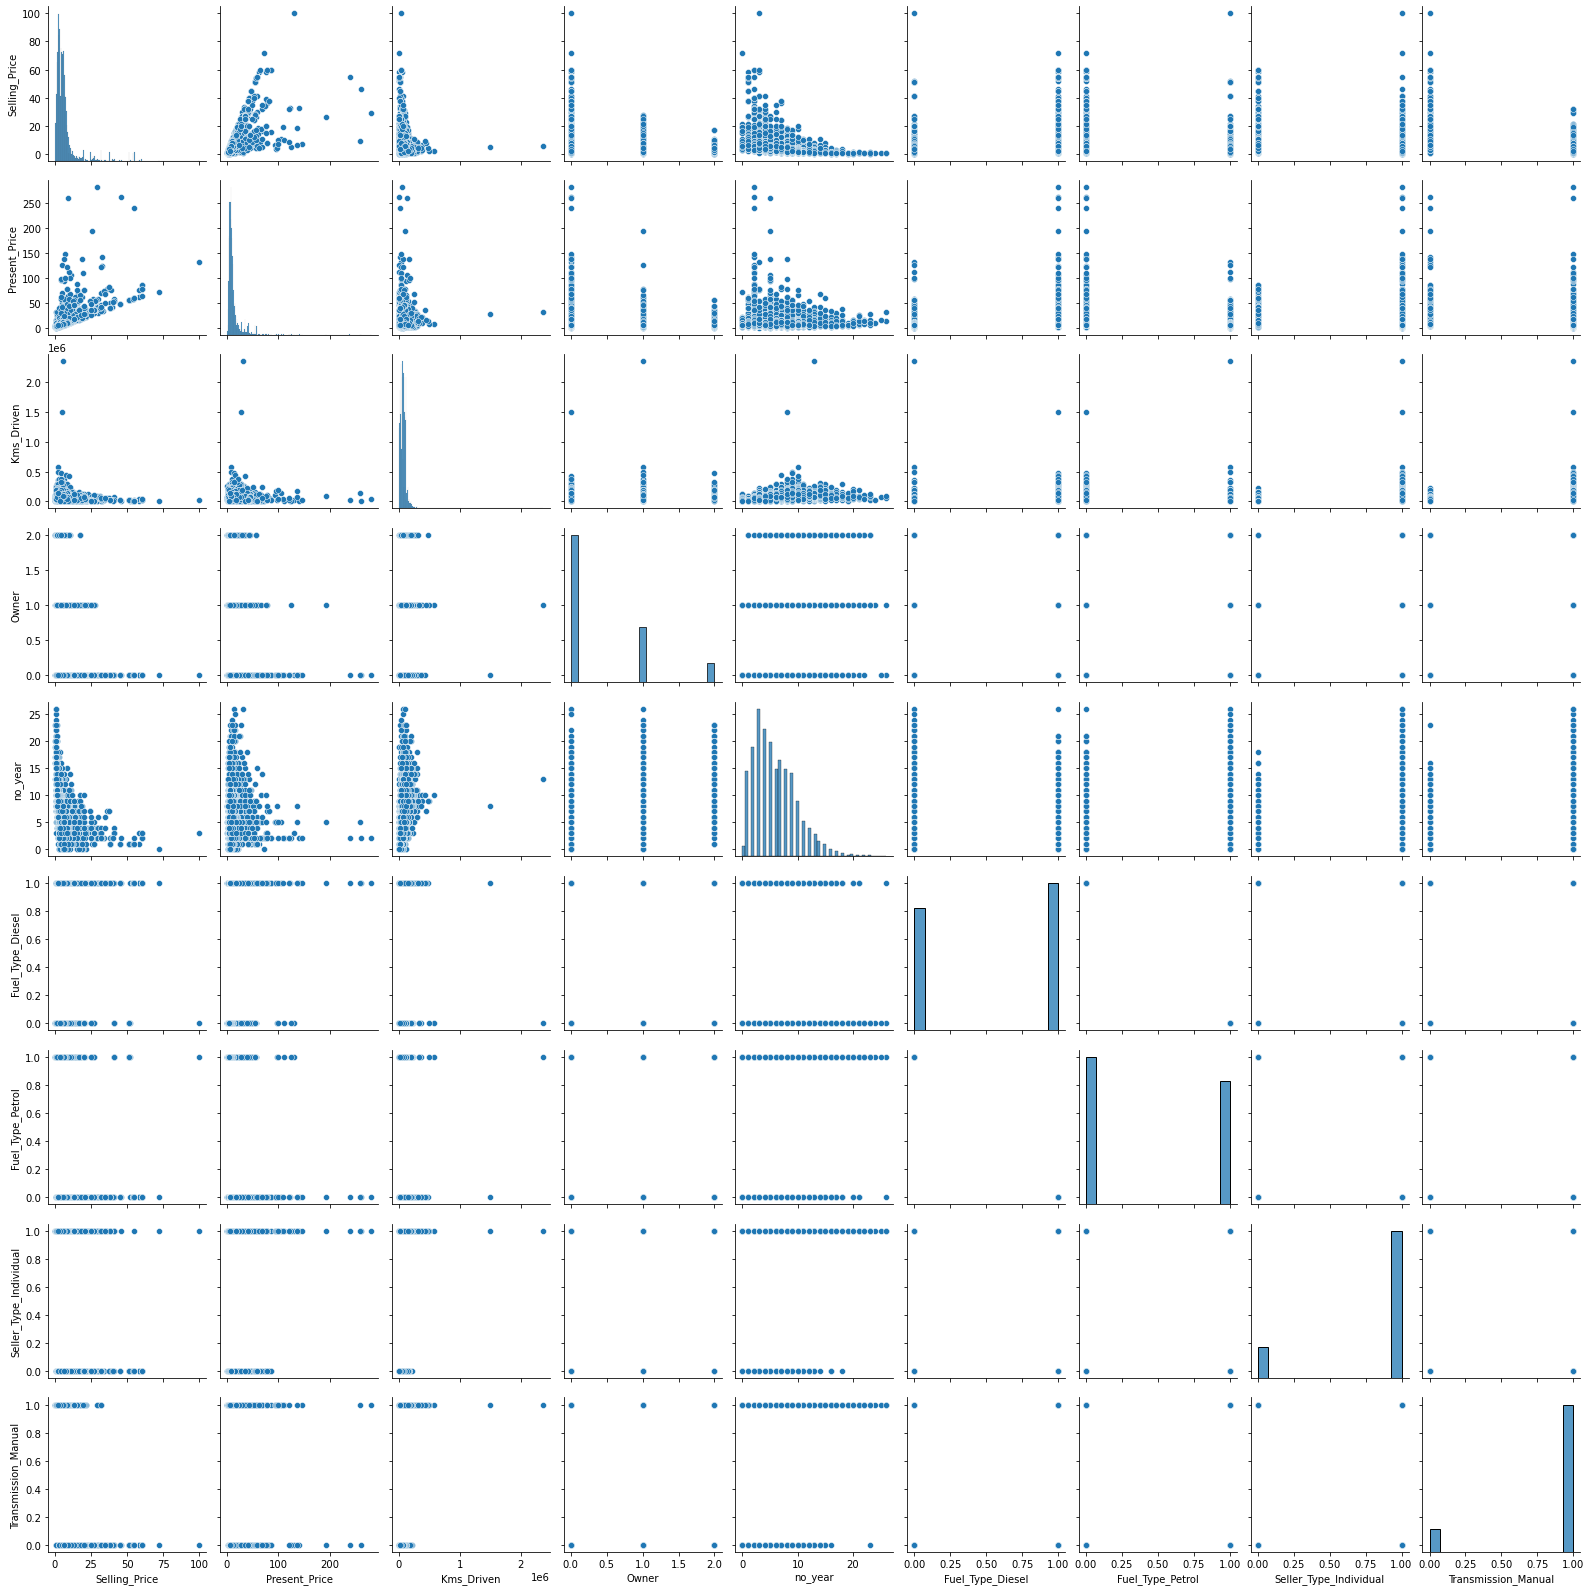

In [7]:
sns.pairplot(final_dataset)

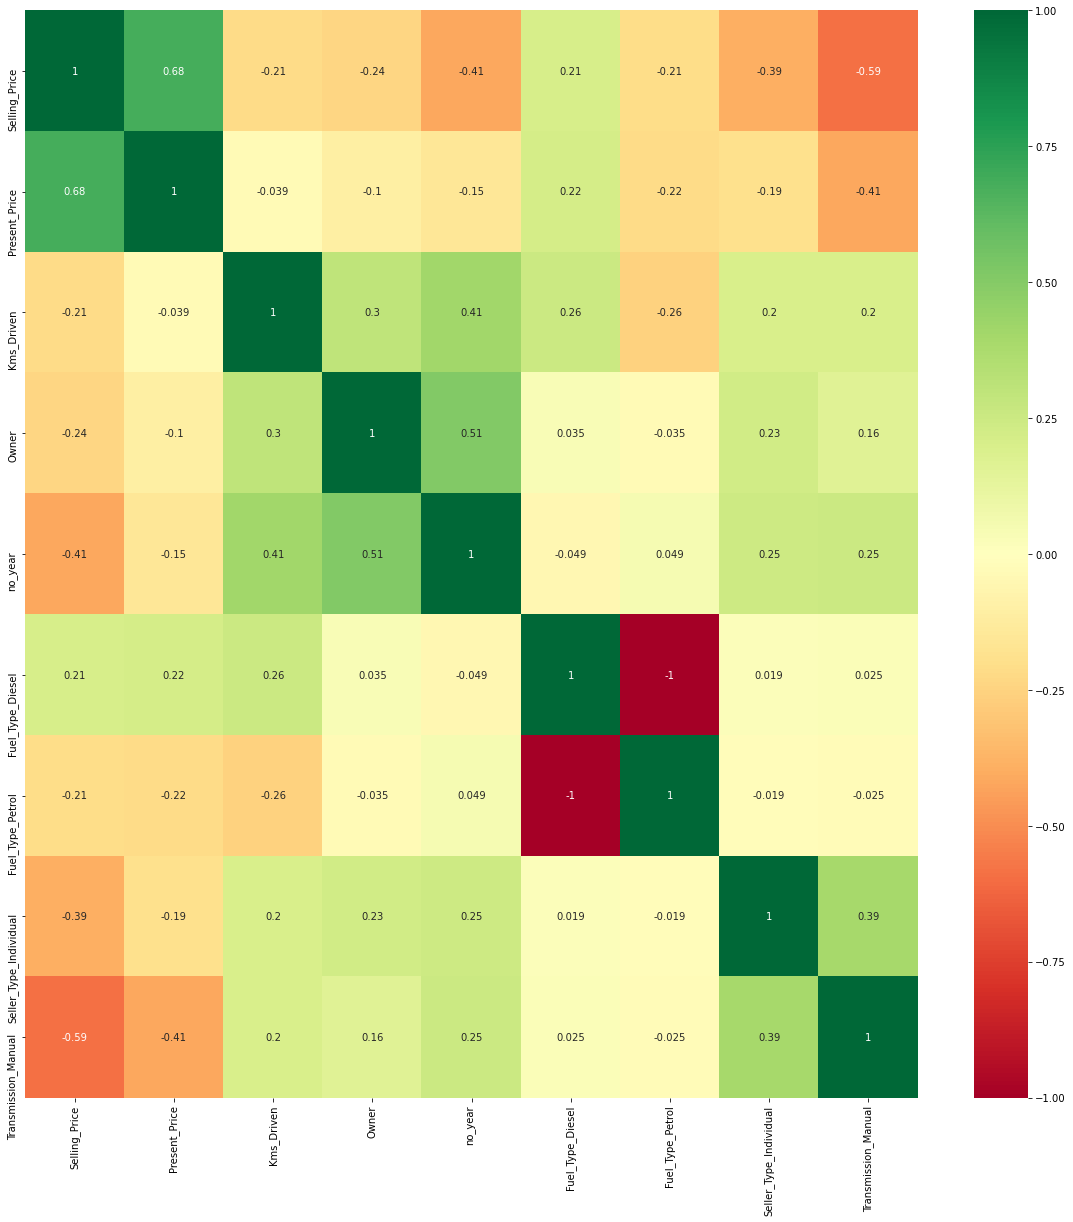

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [10]:
X['Owner'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8.76,145500,0,6,1,0,1,1
1,7.20,120000,1,6,1,0,1,1
2,10.25,140000,2,14,0,1,1,1
3,8.55,127000,0,10,1,0,1,1
4,7.38,120000,0,13,0,1,1,1


In [12]:
y.head()

0    4.50
1    3.70
2    1.58
3    2.25
4    1.30
Name: Selling_Price, dtype: float64

In [13]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.36137393 0.04615768 0.01394685 0.11140206 0.07322322 0.01156914
 0.04878639 0.33354072]


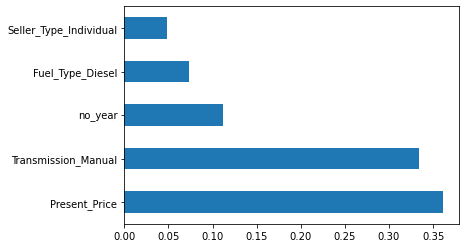

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor=RandomForestRegressor()

In [19]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [22]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [24]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [25]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [27]:
rf_random.best_score_

-4.276568812010757

In [33]:
predictions=rf_random.predict(X_test)

C:\Users\hrgha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

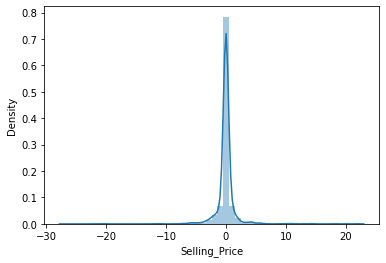

In [34]:
sns.distplot(y_test-predictions)

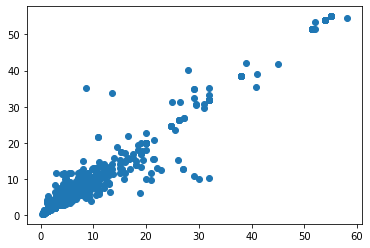

In [35]:
plt.scatter(y_test,predictions)

In [40]:
# single prediction

rf_random.predict([[8.76,145500,0,6,1,0,1,1]])

array([4.50013566])

In [41]:
from sklearn import metrics

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6191486588507473
MSE: 3.412734937988101
RMSE: 1.847358908817694


In [43]:
import bz2
import pickle
import _pickle as cPickle

In [44]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_final.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [45]:
# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
 pikd = open(title + '.pickle', 'wb')
 pickle.dump(data, pikd)
 pikd.close()

full_pickle('model_pickle', rf_random) 
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
def loosen(file):
 pikd = open(file, 'rb')
 data = pickle.load(pikd)
 pikd.close()
 return data

data = loosen('model_pickle.pickle')

data

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
     cPickle.dump(data, f)

compressed_pickle('model_pickle_com', data) 

In [48]:
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
     cPickle.dump(data, f)

data = "model_pickle_com.pbz2"
compressed_pickle('model_pickle_com_com', data) 

In [49]:
# Load any compressed pickle file
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

data = decompress_pickle('     cPickle.dump(data, f)
.pbz2') 
data

SyntaxError: EOL while scanning string literal (<ipython-input-49-634ff05bfab0>, line 7)

In [39]:
def compressed_pickle(title, data):
 with bz2.BZ2File(title + ‘.pbz2’, ‘w’) as f: 
 cPickle.dump(data, f)

SyntaxError: invalid character in identifier (<ipython-input-39-3b56858a64ac>, line 2)